# 03 - SVM Classification on Heart Disease Dataset

Simple notebook to perform SVM classification with different kernels and visualize decision boundaries.

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("✅ Classification libraries imported successfully")

✅ Classification libraries imported successfully


In [10]:
# Load heart disease dataset for classification
df = pd.read_csv('../data/raw/heart_disease.csv')

print(f"📥 Original dataset loaded: {df.shape[0]} patients")
print(f"📊 Original targets: {df['target'].value_counts().to_dict()}")

# Create balanced dataset using clinical risk threshold
print("\n🔄 Creating balanced dataset for classification...")

# Calculate risk score based on clinical factors
risk_score = (
    (df['age'] - 50) * 0.1 +           # Age factor
    df['sex'] * 0.3 +                  # Male higher risk
    df['cp'] * 0.2 +                   # Chest pain type
    (df['trestbps'] - 120) * 0.01 +    # Blood pressure
    (df['chol'] - 200) * 0.005 +       # Cholesterol
    df['exang'] * 0.4 +                # Exercise angina
    df['oldpeak'] * 0.3 +              # ST depression
    df['ca'] * 0.2                     # Number of vessels
)

# Set threshold to create balanced classes
threshold = np.percentile(risk_score, 40)
df['target'] = (risk_score > threshold).astype(int)

# Use age and blood pressure for 2D visualization (easier to plot decision boundaries)
X = df[['age', 'trestbps']].values
y = df['target'].values

print(f"✅ Balanced classification dataset created: {X.shape[0]} patients")
print(f"📊 Heart Disease: {y.sum()} patients ({y.mean()*100:.1f}%)")
print(f"📊 Healthy: {(1-y).sum()} patients ({(1-y).mean()*100:.1f}%)")
print(f"📈 Features: Age and Blood Pressure (for 2D visualization)")
print(f"📈 Risk threshold: {threshold:.2f}")

📥 Original dataset loaded: 54 patients
📊 Original targets: {1: 54}

🔄 Creating balanced dataset for classification...
✅ Balanced classification dataset created: 54 patients
📊 Heart Disease: 32 patients (59.3%)
📊 Healthy: 22 patients (40.7%)
📈 Features: Age and Blood Pressure (for 2D visualization)
📈 Risk threshold: 3.54


In [11]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data prepared for classification:")
print(f"📈 Training set: {X_train.shape[0]} patients")
print(f"📈 Test set: {X_test.shape[0]} patients")
print(f"📊 Features: Age and Blood Pressure (for 2D visualization)")

✅ Data prepared for classification:
📈 Training set: 37 patients
📈 Test set: 17 patients
📊 Features: Age and Blood Pressure (for 2D visualization)


In [12]:
# Train SVM classification models with different kernels
kernels = ['linear', 'rbf']
classification_results = {}

for kernel in kernels:
    print(f"\nTraining SVC with {kernel} kernel...")
    
    # Train model
    svc = SVC(kernel=kernel, C=1.0, random_state=42)
    svc.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = svc.predict(X_train_scaled)
    y_pred_test = svc.predict(X_test_scaled)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    classification_results[kernel] = {
        'model': svc,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'y_pred': y_pred_test
    }
    
    print(f"✅ {kernel.upper()} SVC - Accuracy: {test_acc:.3f}")

print("\n✅ All classification models trained")


Training SVC with linear kernel...
✅ LINEAR SVC - Accuracy: 0.765

Training SVC with rbf kernel...
✅ RBF SVC - Accuracy: 0.824

✅ All classification models trained


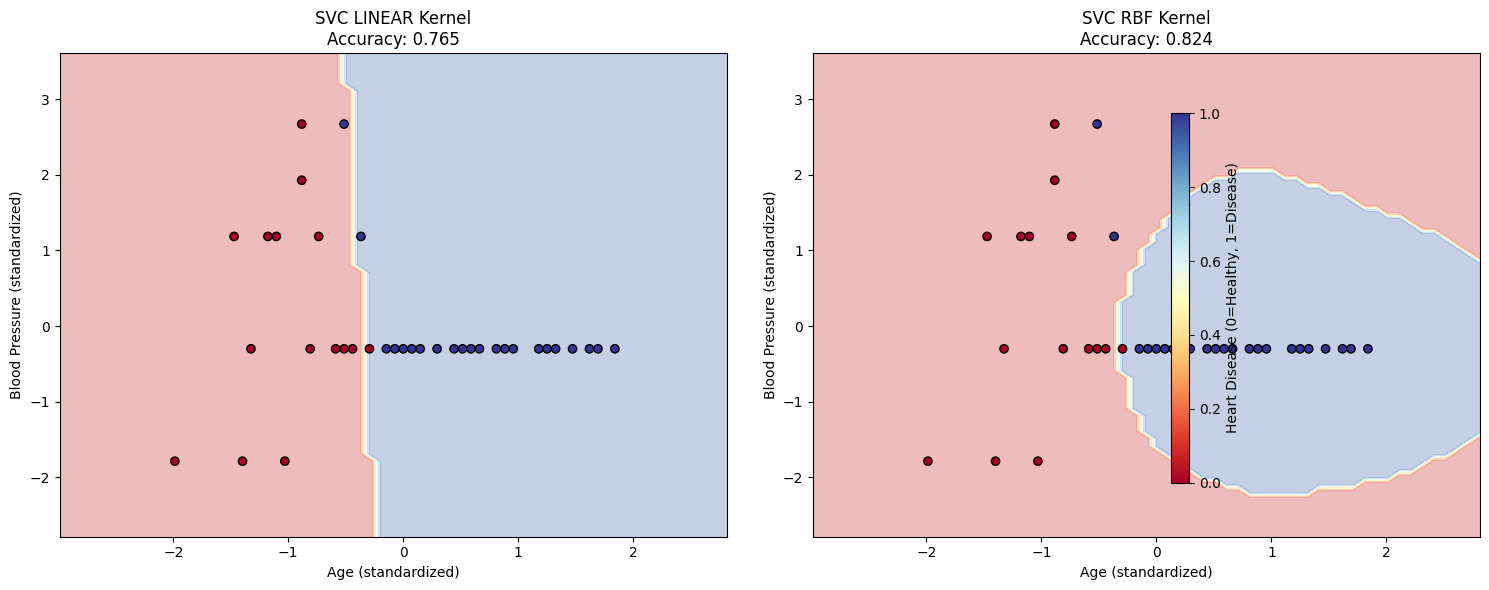

✅ Decision boundary visualization completed


In [13]:
# Visualize decision boundaries
def plot_decision_boundary(X, y, model, title, ax):
    h = 0.1  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    
    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax.set_title(title)
    ax.set_xlabel('Age (standardized)')
    ax.set_ylabel('Blood Pressure (standardized)')
    
    return scatter

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, kernel in enumerate(kernels):
    model = classification_results[kernel]['model']
    acc = classification_results[kernel]['test_acc']
    title = f'SVC {kernel.upper()} Kernel\nAccuracy: {acc:.3f}'
    
    scatter = plot_decision_boundary(X_train_scaled, y_train, model, title, axes[i])

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes, shrink=0.8)
cbar.set_label('Heart Disease (0=Healthy, 1=Disease)')

plt.tight_layout()
plt.show()

print("✅ Decision boundary visualization completed")

In [14]:
# Classification reports and confusion matrices
for kernel in kernels:
    print(f"\n📈 {kernel.upper()} SVM Classification Report:")
    print("=" * 50)
    
    y_pred = classification_results[kernel]['y_pred']
    acc = classification_results[kernel]['test_acc']
    
    print(f"Accuracy: {acc:.3f}")
    print("\nDetailed Report:")
    print(classification_report(y_test, y_pred, target_names=['Healthy', 'Heart Disease']))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(f"              Predicted")
    print(f"Actual    Healthy  Disease")
    print(f"Healthy      {cm[0,0]:3d}      {cm[0,1]:3d}")
    print(f"Disease      {cm[1,0]:3d}      {cm[1,1]:3d}")

print(f"\n✅ Classification analysis completed")


📈 LINEAR SVM Classification Report:
Accuracy: 0.765

Detailed Report:
               precision    recall  f1-score   support

      Healthy       0.71      0.71      0.71         7
Heart Disease       0.80      0.80      0.80        10

     accuracy                           0.76        17
    macro avg       0.76      0.76      0.76        17
 weighted avg       0.76      0.76      0.76        17


Confusion Matrix:
              Predicted
Actual    Healthy  Disease
Healthy        5        2
Disease        2        8

📈 RBF SVM Classification Report:
Accuracy: 0.824

Detailed Report:
               precision    recall  f1-score   support

      Healthy       0.75      0.86      0.80         7
Heart Disease       0.89      0.80      0.84        10

     accuracy                           0.82        17
    macro avg       0.82      0.83      0.82        17
 weighted avg       0.83      0.82      0.82        17


Confusion Matrix:
              Predicted
Actual    Healthy  Disease
Hea

In [16]:
# Model comparison summary
print("\n🏆 SVM Classification Model Comparison:")
print("=" * 50)

for kernel in kernels:
    acc = classification_results[kernel]['test_acc']
    print(f"{kernel.upper()} SVC:")
    print(f"  • Test Accuracy: {acc:.3f}")
    print(f"  • Performance: {'Excellent' if acc > 0.9 else 'Good' if acc > 0.8 else 'Moderate' if acc > 0.7 else 'Poor'}")
    print()

# Best model
best_kernel = max(kernels, key=lambda k: classification_results[k]['test_acc'])
print(f"🏅 Best performing model: {best_kernel.upper()} SVC")
print(f"✅ SVM Classification analysis completed")


🏆 SVM Classification Model Comparison:
LINEAR SVC:
  • Test Accuracy: 0.765
  • Performance: Moderate

RBF SVC:
  • Test Accuracy: 0.824
  • Performance: Good

🏅 Best performing model: RBF SVC
✅ SVM Classification analysis completed
